# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.182706e+01     7.432050e+00
 * time: 0.0021631717681884766
     1     2.946180e+01     4.787526e+00
 * time: 0.008833169937133789
     2     2.346396e+01     5.994387e+00
 * time: 0.014484167098999023
     3     2.266608e+01     7.888606e+00
 * time: 0.01922607421875
     4     1.192338e+01     1.950622e+00
 * time: 0.024529218673706055
     5     9.693313e+00     1.102756e+00
 * time: 0.02914714813232422
     6     9.147150e+00     1.476604e+00
 * time: 0.03290200233459473
     7     8.679531e+00     7.574531e-01
 * time: 0.03671002388000488
     8     8.447718e+00     7.371726e-01
 * time: 0.04110002517700195
     9     8.305198e+00     6.609807e-01
 * time: 0.04582405090332031
    10     8.138713e+00     5.980692e-01
 * time: 0.050631046295166016
    11     8.008297e+00     5.303443e-01
 * time: 0.05523419380187988
    12     7.929971e+00     3.196165e-01
 * time: 0.060172080993652344
    13     7.904400e+00     5.656348e-01
 * t

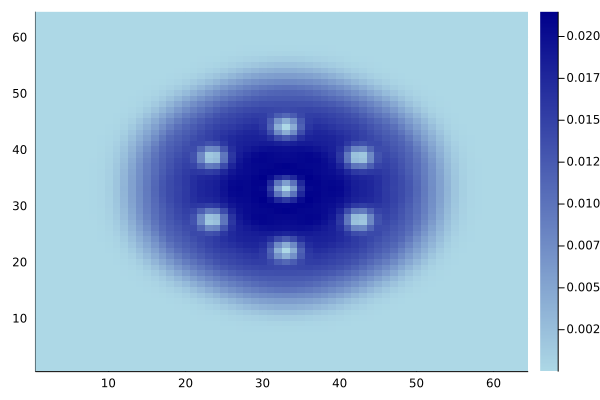

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)